In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# List all files in the current directory to debug the FileNotFoundError
#print("Files in the current directory:")
#print(os.listdir('.'))

Files in the current directory:
['auto.csv', 'CollabActivity8_3.ipynb', '01-box-plots.png', 'EmployeesPerformanceDataset.csv', 'gdp.csv', 'Untitled1.ipynb', '.pythonstartup.py', 'Untitled.ipynb', 'untitled.py', '.ipython', 'Whickham.txt', 'Pipelines-Copy1.ipynb', 'histogramplot.png', '.virtualenvs', '.jupyter', 'Practical Application Assignment 3 - Comparing Classifiers.ipynb', 'colab_activity9_1_starter.zip', 'bank-additional-full.csv', '.kaggle', 'Lecture 3 - Live Runthrough One.ipynb', 'plots', 'train_cubic.csv', '07-scatter-plots-02.png', 'nba.csv', 'colab_activity8_3_starter.zip', 'try_it_14.1_required.ipynb', 'Untitled2.ipynb', 'scikit_learn_data', 'README.ipynb', '06-scatter-plots-01.png', '.local', 'lineplot.png', 'bank-additional-full-cleaned-02.csv', 'insurance.csv', 'prompt (1).ipynb', '.bashrc', 'colab_activity9_1.ipynb', '02-histograms.png', 'Untitled3.ipynb', '.profile', 'bank-additional.csv', '.cache', 'prompt_III.ipynb', 'scatterplot.png', 'test_cubic.csv', 'Untitled4.i

In [4]:
# Load the dataset
file_path = "data/EmployeesPerformanceDataset.csv"
try:
    df = pd.read_csv(file_path)
    print("\nCSV file loaded successfully!\n")
except FileNotFoundError:
    print(f"\nError: The file '{file_path}' was not found. Please check the file name and try again.")
    exit()


CSV file loaded successfully!



In [5]:
# Initial Data Cleaning and Preparation
# Drop the 'Notes' column as it contains no useful information
df = df.drop(columns=['Notes'])

In [6]:
# Drop rows with missing values in key columns to ensure meaningful visualizations
df = df.dropna(subset=['Evaluee', 'Evaluator', 'Score'])

In [7]:
# Convert 'Completed date' to datetime objects
df['Completed date'] = pd.to_datetime(df['Completed date'], errors='coerce')

/tmp/ipykernel_465/709317498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Completed date'] = pd.to_datetime(df['Completed date'], errors='coerce')


In [8]:
# Convert 'Score' to numeric, coercing errors will turn non-numeric values into NaN
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [9]:
# Drop any rows where the Score could not be converted
df = df.dropna(subset=['Score'])

In [10]:
print("Initial data cleaning complete. Data types and missing values after cleaning:")
df.info()

Initial data cleaning complete. Data types and missing values after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2245 entries, 3 to 2983
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Evaluee                2245 non-null   object        
 1   Person code            2245 non-null   object        
 2   Job title              2245 non-null   object        
 3   Evaluator              2245 non-null   object        
 4   Team                   1942 non-null   object        
 5   Evaluation level       2243 non-null   object        
 6   Project/Duration       2245 non-null   object        
 7   Completed date         2245 non-null   datetime64[ns]
 8   Evaluation title       2245 non-null   object        
 9   Type of evaluation     2245 non-null   object        
 10  Result area            2245 non-null   object        
 11  Performance indicator  2245 non-null   object   

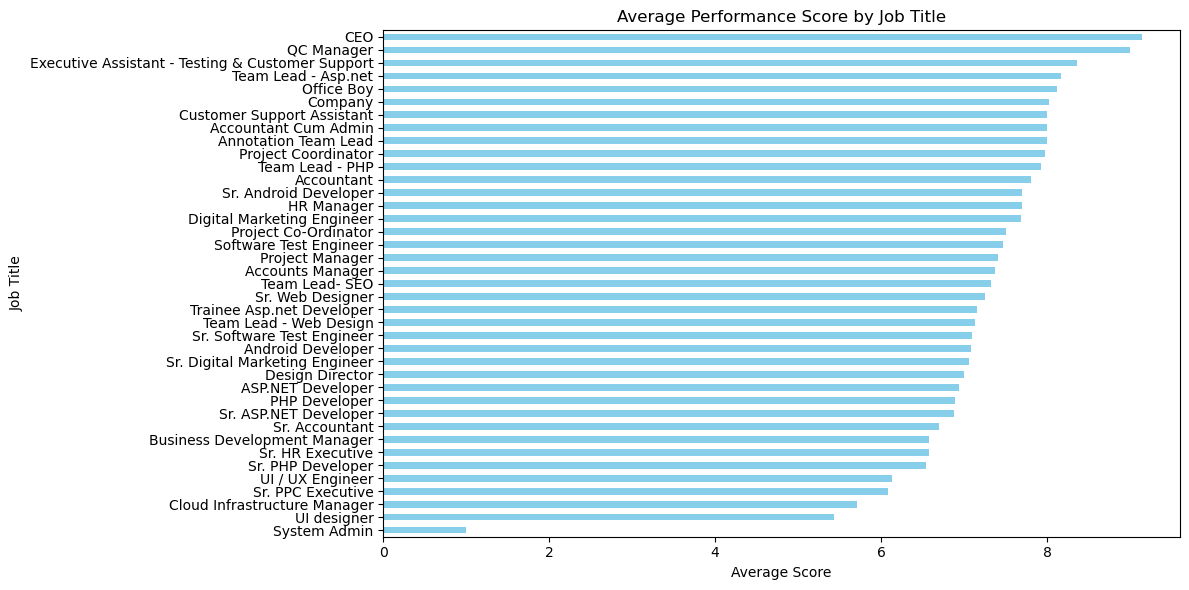

In [11]:
# --- Visualizations ---

# 1. Bar Chart: Average Score by Job Title
avg_score_by_job = df.groupby('Job title')['Score'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_score_by_job.plot(kind='barh', color='skyblue')
plt.title('Average Performance Score by Job Title')
plt.xlabel('Average Score')
plt.ylabel('Job Title')
plt.tight_layout()
plt.savefig('images/avg_score_by_job_title.png')

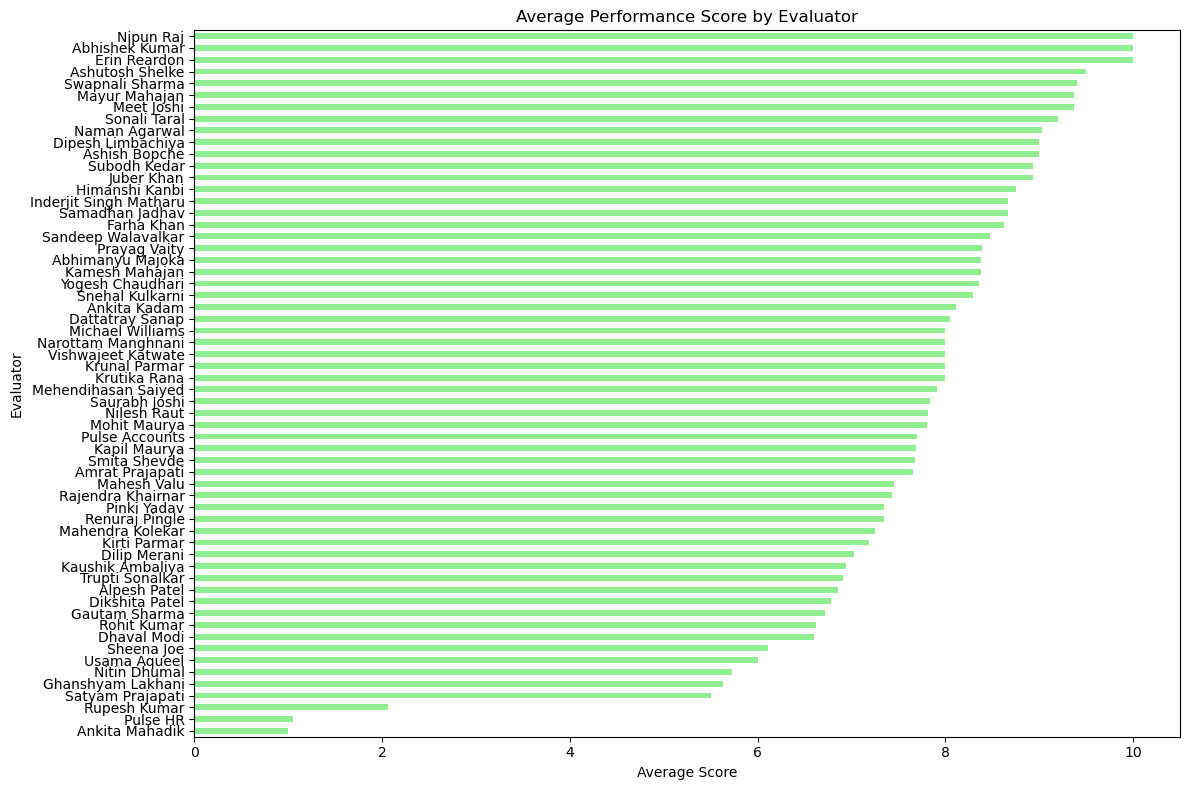

In [12]:
# 2. Bar Chart: Average Score by Evaluator
avg_score_by_evaluator = df.groupby('Evaluator')['Score'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_score_by_evaluator.plot(kind='barh', color='lightgreen')
plt.title('Average Performance Score by Evaluator')
plt.xlabel('Average Score')
plt.ylabel('Evaluator')
plt.tight_layout()
plt.savefig('images/avg_score_by_evaluator.png')

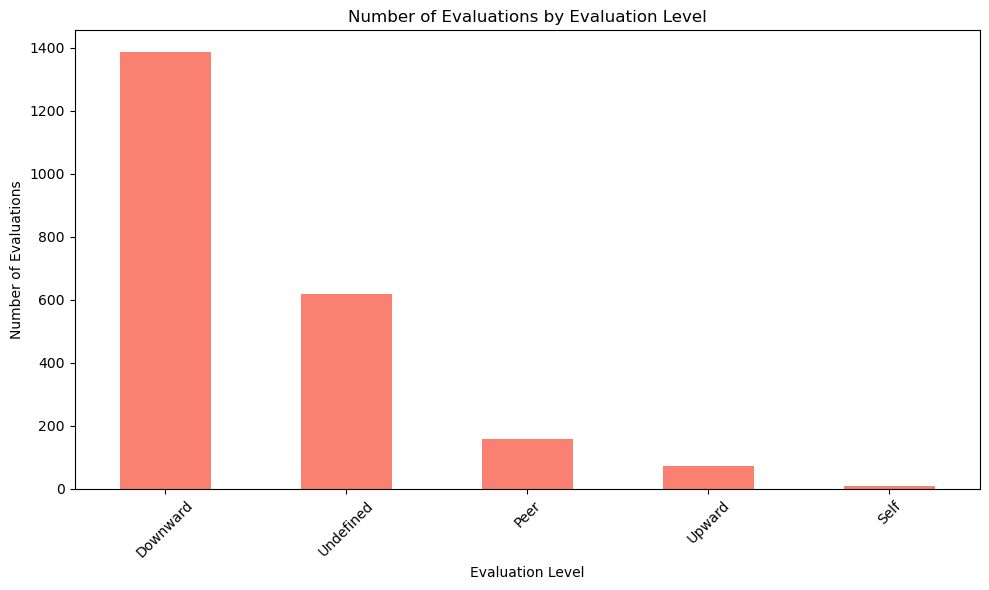

In [13]:
# 3. Bar Chart: Count of Evaluations by Evaluation Level
evaluation_counts = df['Evaluation level'].value_counts()
plt.figure(figsize=(10, 6))
evaluation_counts.plot(kind='bar', color='salmon')
plt.title('Number of Evaluations by Evaluation Level')
plt.xlabel('Evaluation Level')
plt.ylabel('Number of Evaluations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/evaluation_counts_by_level.png')

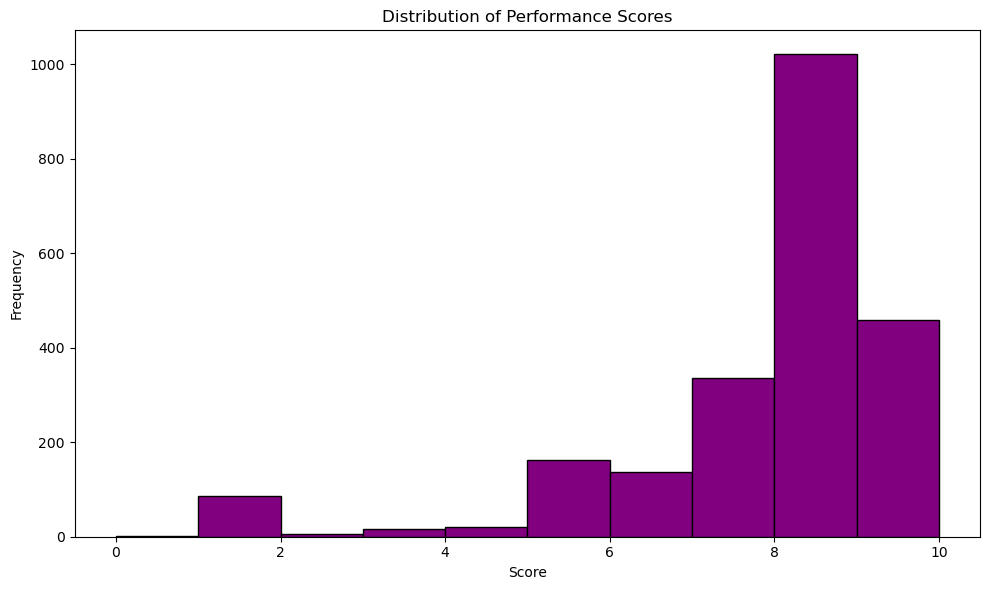

In [14]:
# 4. Histogram: Distribution of Scores
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Performance Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('images/score_distribution_histogram.png')